<a href="https://colab.research.google.com/github/zubeydeulukok/CNN_Projects/blob/main/ResNet50_IMAGENET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [66]:
import os 
os.chdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN")

In [67]:
!ls

CNN_1.ipynb	   Fashion_MNIST.ipynb	    VGG16_ObjectDetection.ipynb
drive		   images
fashion_mnist1.h5  ResNet50-IMAGENET.ipynb


# Imagenet

https://image-net.org/about.php

https://image-net.org/static_files/files/imagenet_ilsvrc2017_v1.0.pdf

# Import Library

In [68]:
# import the necessary packages
from keras.applications import ResNet50
from keras.preprocessing import image
from keras_preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import requests

In [69]:
# load the ResNet50 network pre-trained on the ImageNet dataset
model = ResNet50(weights='imagenet')

In [70]:
def prepare_image(image, target):
	# resizing input image and preprocessings
	image = image.resize(target)  # We supply a target_size of 224 x 224 pixels, 
                            # ...the required spatial input image dimensions for the VGG16, VGG19, and ResNet50 network architectures
	image = img_to_array(image)  # convert the image to a NumPy format, each image is 224 pixels wide, 224 pixels tall, and has 3 channels
	image = np.expand_dims(image, axis=0)  # for classification, we need to expand the dimensions to be (1, 3, 224, 224).
	image = preprocess_input(image)  # preprocess the image by subtracting the mean RGB pixel intensity computed from the ImageNet dataset.

	return image

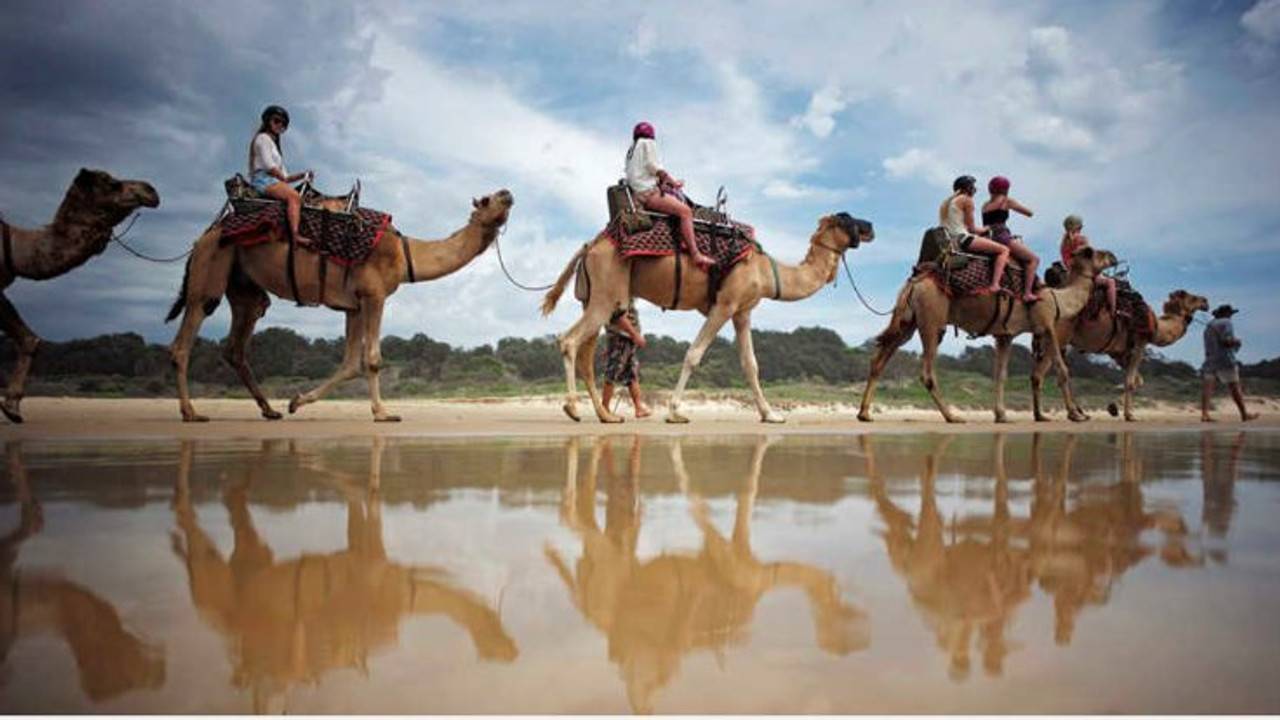

In [71]:
ImageURL = "https://i.gazeteduvar.com.tr/2/1280/720/2020/01/deve-1.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

In [72]:
pre_image = prepare_image(image, target=(224,224))
pre_image.shape

(1, 224, 224, 3)

In [73]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # resized an image as 224 x 224
# classify the image
preds = model.predict(pre_image)
results = decode_predictions(preds) 
results

1/1 [==============================] - 3s 3s/step


[[('n02437312', 'Arabian_camel', 0.9665688),
  ('n03388043', 'fountain', 0.0075867935),
  ('n02437616', 'llama', 0.0052674366),
  ('n09428293', 'seashore', 0.0051618367),
  ('n02422699', 'impala', 0.0015443611)]]

In [74]:
results[0]

[('n02437312', 'Arabian_camel', 0.9665688),
 ('n03388043', 'fountain', 0.0075867935),
 ('n02437616', 'llama', 0.0052674366),
 ('n09428293', 'seashore', 0.0051618367),
 ('n02422699', 'impala', 0.0015443611)]

In [75]:
# loop over the predictions and display the rank-5 predictions +
# probabilities to our terminal
data["predictions"] = []

for (imagenetID, label, prob) in results[0]: 
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'Arabian_camel', 'probability': 0.9665688276290894}, {'label': 'fountain', 'probability': 0.0075867935083806515}, {'label': 'llama', 'probability': 0.005267436616122723}, {'label': 'seashore', 'probability': 0.005161836743354797}, {'label': 'impala', 'probability': 0.001544361119158566}]}


In [76]:
print("The highest probability is {0} and the class is {1}.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 


The highest probability is 0.9665688276290894 and the class is Arabian_camel.


In [77]:
import os
os.chdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images")
!pwd

/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images


In [80]:
images = os.listdir("/gdrive/My Drive/BTK-Keras ile derin öğrenmeye giriş/CNN/images")
images

['cat1.jpg',
 'cat2.jpg',
 'cat3.jpg',
 'cow1.jpg',
 'cow2.jpg',
 'buffalo1.jpg',
 'buffalo2.jpg',
 'daisy1.jpg',
 'flowers.jpg',
 'daisy2.jpg']

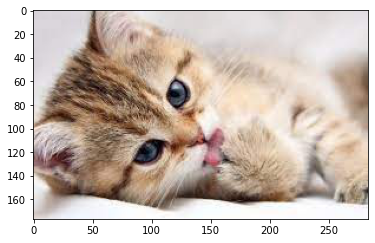

In [84]:
# plt.imshow(imread(images[0]));

In [85]:
# Image.open(images[0])

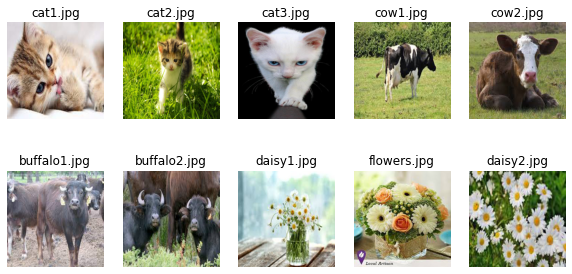

In [87]:
plt.figure(figsize=(10,5))
x, y = 5, 2
for i in range(10):
  image = Image.open(images[i]) 
  image = image.resize((224, 224))
  plt.subplot(y, x, i+1)
  plt.imshow(image)
  plt.title(images[i])
  plt.axis("off")

In [88]:
for i in images:
  image = Image.open(i) 
  pre_image = prepare_image(image, target=(224, 224))   
  preds = model.predict(pre_image)
  results = decode_predictions(preds) 
  data["predictions"] = []

  for (imagenetID, label, prob) in results[0]: 
    r = {"label": label, "probability": float(prob)}
    data["predictions"].append(r)
    
  data["success"] = True

  print(data)
  print("The highest probability is {0} and the class is {1}.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 


1/1 [==============================] - 0s 214ms/step
{'success': True, 'predictions': [{'label': 'tabby', 'probability': 0.6650408506393433}, {'label': 'lynx', 'probability': 0.25632762908935547}, {'label': 'tiger_cat', 'probability': 0.030514487996697426}, {'label': 'Egyptian_cat', 'probability': 0.013730484060943127}, {'label': 'tiger', 'probability': 0.005890682339668274}]}
The highest probability is 0.6650408506393433 and the class is tabby.
1/1 [==============================] - 0s 211ms/step
{'success': True, 'predictions': [{'label': 'tiger_cat', 'probability': 0.46525534987449646}, {'label': 'Egyptian_cat', 'probability': 0.22402553260326385}, {'label': 'tabby', 'probability': 0.13225513696670532}, {'label': 'broccoli', 'probability': 0.019893931224942207}, {'label': 'bucket', 'probability': 0.015581546351313591}]}
The highest probability is 0.46525534987449646 and the class is tiger_cat.
1/1 [==============================] - 0s 225ms/step
{'success': True, 'predictions': [{'l